<a href="https://colab.research.google.com/github/DhimanTarafdar/DBSCAN-Hierarchical-Clustering-practice/blob/main/Practice_DBSCAN_%26_Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 25: DBSCAN & Hierarchical Clustering

This notebook is designed for hands-on practice.



## Dataset 1: Blob Dataset with Different Densities

This dataset contains clusters with different densities.
DBSCAN should behave differently for each cluster.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import dendrogram, linkage

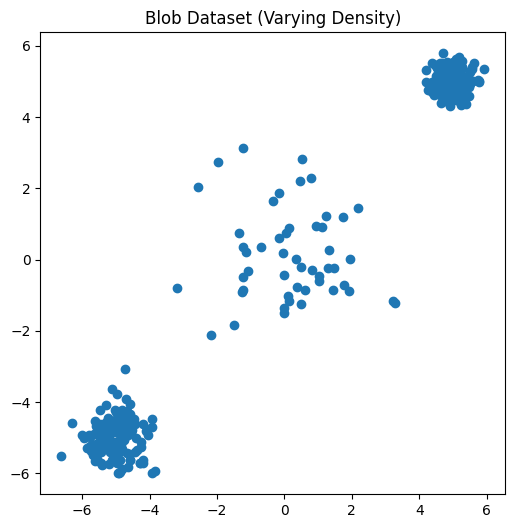

In [4]:
#Done for you


X_blobs, _ = make_blobs(
    n_samples=[150, 50, 200],
    centers=[(-5, -5), (0, 0), (5, 5)],
    cluster_std=[0.5, 1.5, 0.3],
    random_state=42
)

plt.figure(figsize=(6,6))
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.title("Blob Dataset (Varying Density)")
plt.show()


### TODO 1: Scaling

Scale the dataset using StandardScaler.

Think:
- Why is scaling important here?
- What happens if we skip scaling?


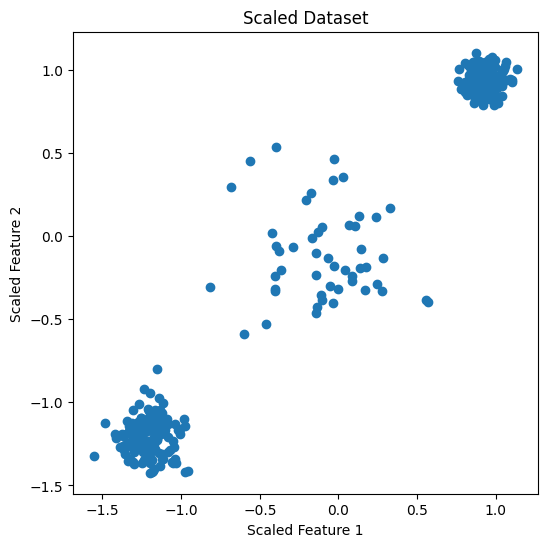

In [5]:
# TODO: Apply StandardScaler here
scaler = StandardScaler()
X_blobs_scaled = scaler.fit_transform(X_blobs)

plt.figure(figsize=(6,6))
plt.scatter(X_blobs_scaled[:,0], X_blobs_scaled[:,1])
plt.title("Scaled Dataset")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()


### TODO 2: DBSCAN on Blob Dataset

Apply DBSCAN.
Experiment with different values of eps and min_samples.


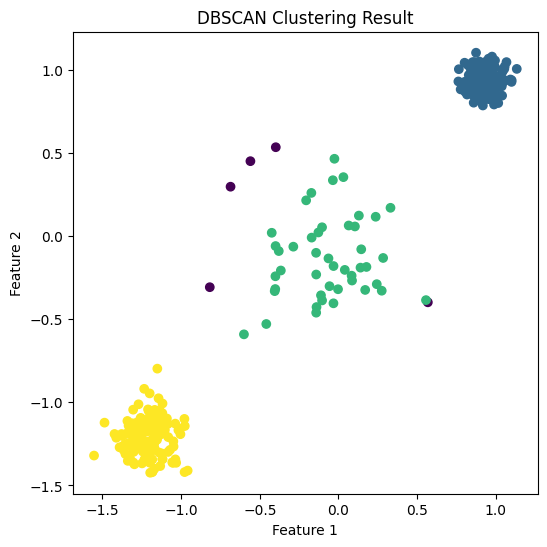

Unique cluster labels: [-1  0  1  2]


In [6]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels_blobs = dbscan.fit_predict(X_blobs_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_blobs_scaled[:,0], X_blobs_scaled[:,1], c=db_labels_blobs, cmap='viridis')
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Unique cluster labels:", np.unique(db_labels_blobs))

In [18]:
# Experiment 1: small eps
dbscan = DBSCAN(eps=0.2, min_samples=5)
db_labels_blobs = dbscan.fit_predict(X_blobs_scaled)
print("eps=0.2:", np.unique(db_labels_blobs))

# Experiment 2: large eps
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels_blobs = dbscan.fit_predict(X_blobs_scaled)
print("eps=0.5:", np.unique(db_labels_blobs))

# Experiment 3: large min_samples
dbscan = DBSCAN(eps=0.3, min_samples=10)
db_labels_blobs = dbscan.fit_predict(X_blobs_scaled)
print("min_samples=10:", np.unique(db_labels_blobs))

eps=0.2: [-1  0  1  2]
eps=0.5: [0 1 2]
min_samples=10: [-1  0  1  2]



### TODO 3: k-Distance Plot

Use a k-distance plot to estimate eps.


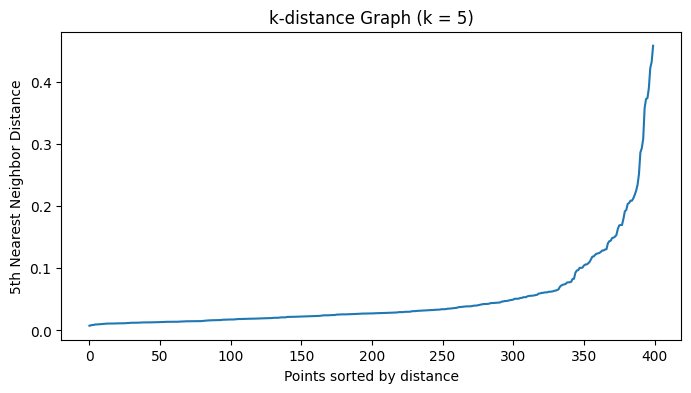

In [13]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbours_fit = neighbors.fit(X_blobs_scaled)
distances, indices = neighbours_fit. kneighbors(X_blobs_scaled)

distances = np.sort(distances[:,4])

plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("k-distance Graph (k = 5)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

In [19]:
print("Unique cluster labels:", np. unique(db_labels_blobs))
print("Total points:", len(db_labels_blobs))

for label in np.unique(db_labels_blobs):
    if label == -1:
        print(f"Noise:  {np.sum(db_labels_blobs == label)} points")
    else:
        print(f"Cluster {label}: {np.sum(db_labels_blobs == label)} points")

Unique cluster labels: [-1  0  1  2]
Total points: 400
Noise:  7 points
Cluster 0: 200 points
Cluster 1: 43 points
Cluster 2: 150 points


In [20]:
print(db_labels_blobs)

[ 0  0  0  0  0  0  0  1  2  2  0  2  0  2  2  2  0  1  2  2  2  0  0  0
  2  2  0  0  2  0  0  0  2  2  0  2  2  0  2  0  2  2  0  2  0  2  2  0
  2  0  0  1  0  0  2  0  0  0  0  0  0  2  0  0  2  0  0  0  2  2  0  2
  1  0  1  2  2  2  2 -1  0  0  0  0  0  2  1  0  0  1  0  0  0  2  0  0
  2  0  0  0  0  0  0  0  0  2  2  2  0  0  0  0  1  0  2  2  2  0  2  0
  2  0  0  0  2  0  2  2  2  1  0  0  0  2 -1  2  0  2 -1  0  0  2  0  2
  1  2  0  2  0  2  0  2  0  2  2  2  2  2  1  1  2  0  0  0  0  0  0  2
  0  0  0  2  2  2  2  1  0  2  1  0  1  0  2  0 -1  2  0  0  2  0  0  0
  0  0  0  1  2  0  2  2  1  0  2  0  0  2  1  2  2 -1  0  0  2  2  2  0
  2  0 -1  0  2  0  2  0  2  0  2  0  0  0  0  0  0  2  0  2  2  2  0  0
  2  2  0  1  1  1  2  0  1  0  2  0  2  1  2  0  0  2  1  2  0  0  0  0
  2  1  2  0  0  2  2  0  2  2  1  0  2  2  0  0  2  2  0  0  0  1  2  0
  2  2  0  0  2  2  2  0  0  1  0  0  2  0  1  0  0  2  2  2  0  0  2  2
  0  2  0  0  0  0  0  0  2  0  0  2  2  2  2  0  2


## Dataset 2: Circular Dataset

This dataset contains non-linear circular clusters.


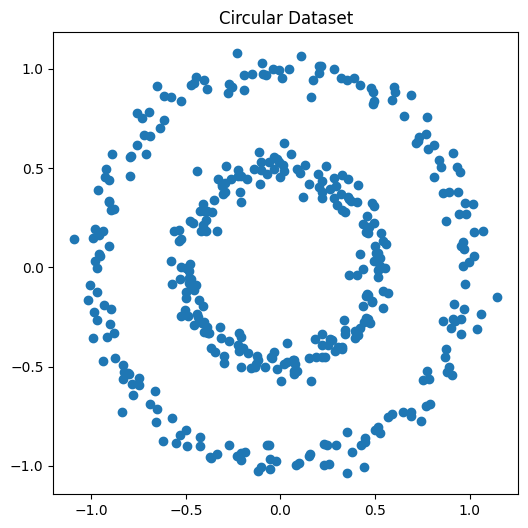

In [24]:
#Done for you
from sklearn.datasets import make_circles

X_circles, _ = make_circles(
    n_samples=400,
    factor=0.5,
    noise=0.05,
    random_state=42
)

plt.figure(figsize=(6,6))
plt.scatter(X_circles[:,0], X_circles[:,1])
plt.title("Circular Dataset")
plt.show()


### TODO 4: DBSCAN on Circular Data

Apply DBSCAN and observe cluster shape.


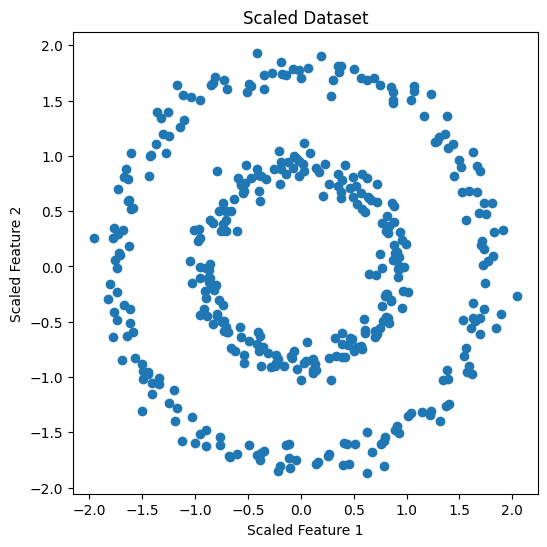

In [25]:
# TODO: Apply scaling
scaler = StandardScaler()
X_circles_scaled = scaler. fit_transform(X_circles)

plt.figure(figsize=(6,6))
plt.scatter(X_circles_scaled[:,0], X_circles_scaled[:,1])
plt.title("Scaled Dataset")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()

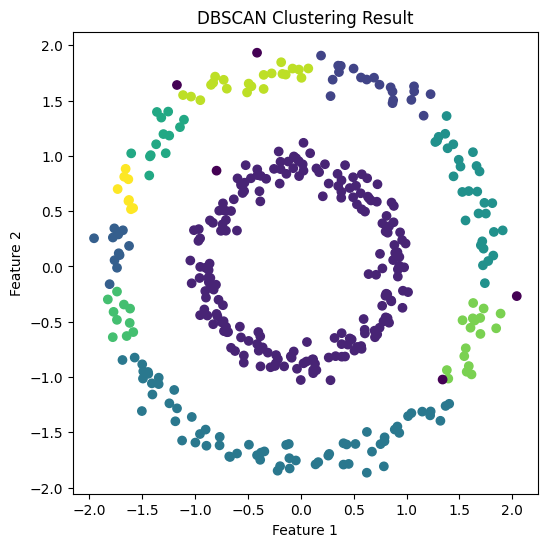

Unique cluster labels: [-1  0  1  2  3  4  5  6  7  8  9]


In [26]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
db_labels_circles = dbscan.fit_predict(X_circles_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=db_labels_circles, cmap='viridis')
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Unique cluster labels:", np.unique(db_labels_circles))

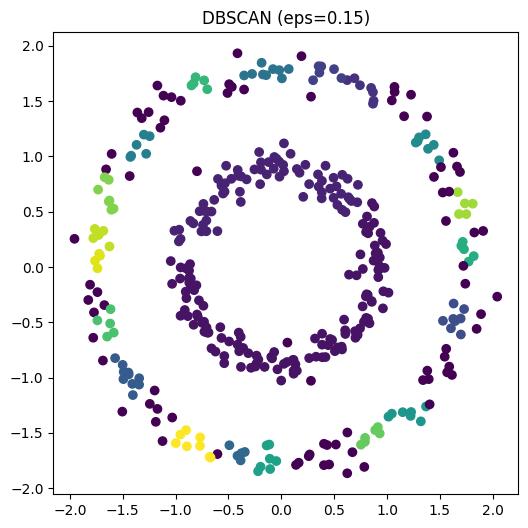

eps=0.15, Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


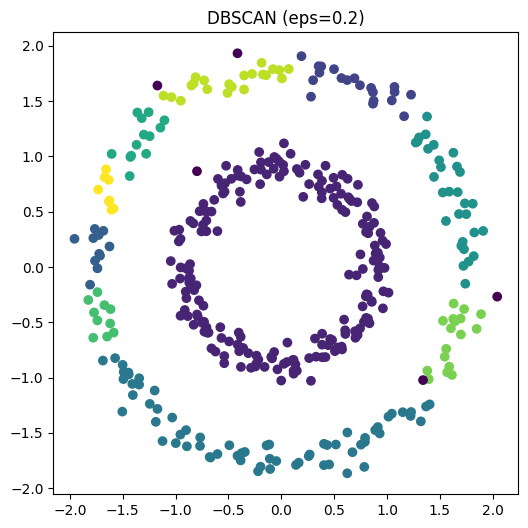

eps=0.2, Clusters: [-1  0  1  2  3  4  5  6  7  8  9]


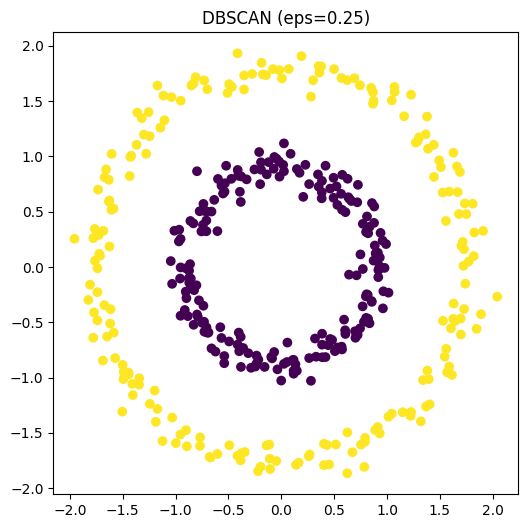

eps=0.25, Clusters: [0 1]


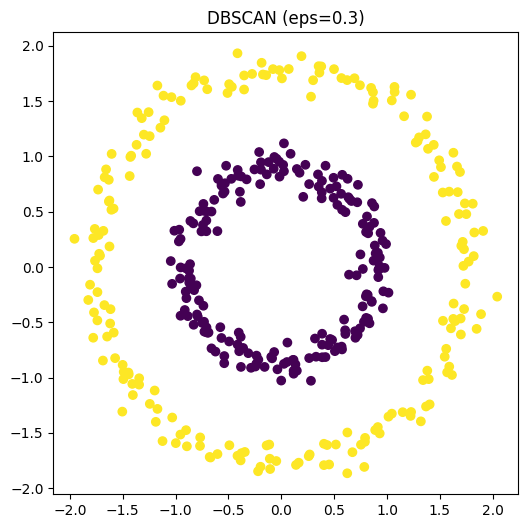

eps=0.3, Clusters: [0 1]


In [27]:
# Different eps values try
for eps_val in [0.15, 0.2, 0.25, 0.3]:
    dbscan = DBSCAN(eps=eps_val, min_samples=5)
    labels = dbscan.fit_predict(X_circles_scaled)

    plt.figure(figsize=(6,6))
    plt.scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=labels, cmap='viridis')
    plt.title(f"DBSCAN (eps={eps_val})")
    plt.show()

    print(f"eps={eps_val}, Clusters:", np.unique(labels))

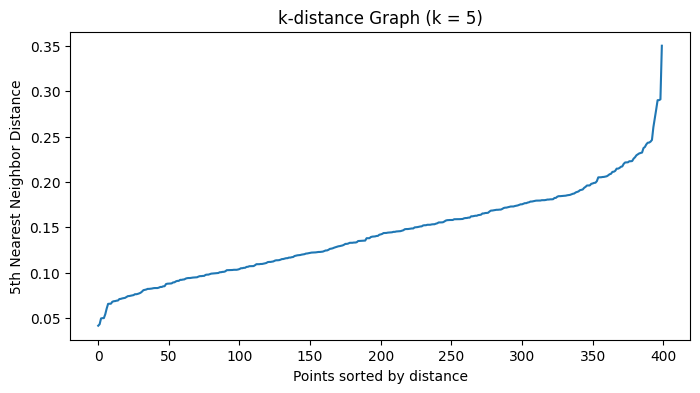

In [28]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbours_fit = neighbors.fit(X_circles_scaled)
distances, indices = neighbours_fit. kneighbors(X_circles_scaled)

distances = np.sort(distances[:,4])

plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("k-distance Graph (k = 5)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

In [29]:
# Graph eps test
dbscan = DBSCAN(eps=0.2, min_samples=5)
db_labels_circles = dbscan.fit_predict(X_circles_scaled)

print("Clusters found:", len(np.unique(db_labels_circles)) - (1 if -1 in db_labels_circles else 0))
print("Labels:", np.unique(db_labels_circles))

Clusters found: 10
Labels: [-1  0  1  2  3  4  5  6  7  8  9]



## Hierarchical Clustering Practice



### TODO 5: Agglomerative Clustering

Try different linkage methods:
single, complete, average, ward


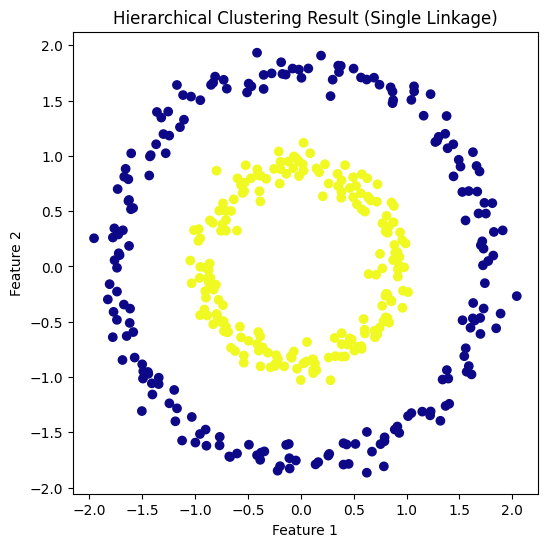

In [30]:
# TODO: Apply hierarchical clustering here

hc_single = AgglomerativeClustering(n_clusters=2, linkage='single')
hc_single_labels = hc_single.fit_predict(X_circles_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=hc_single_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Single Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

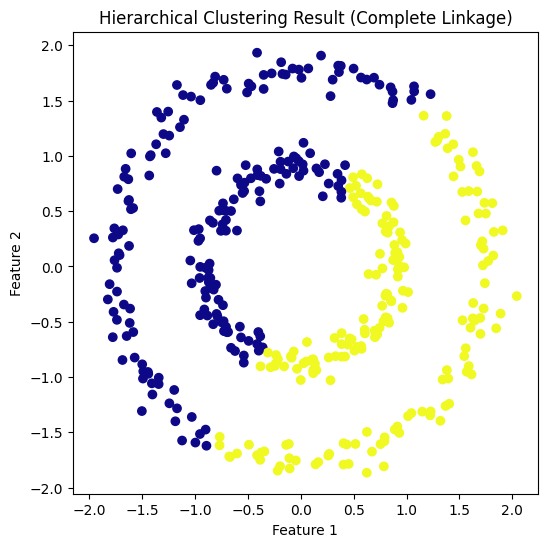

In [31]:
hc_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
hc_complete_labels = hc_complete.fit_predict(X_circles_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=hc_complete_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Complete Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

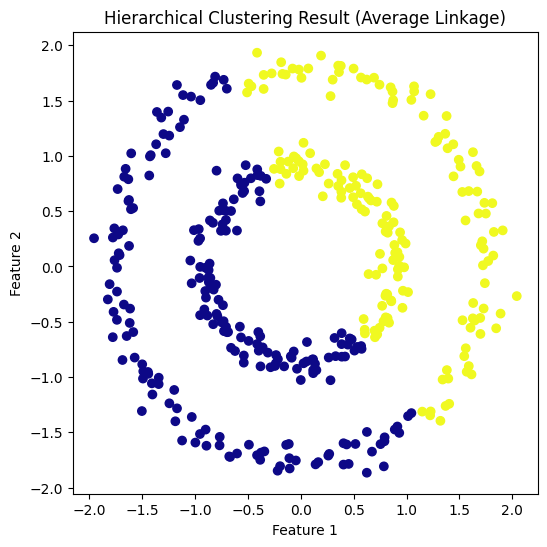

In [32]:
hc_average = AgglomerativeClustering(n_clusters=2, linkage='average')
hc_average_labels = hc_average.fit_predict(X_circles_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=hc_average_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Average Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

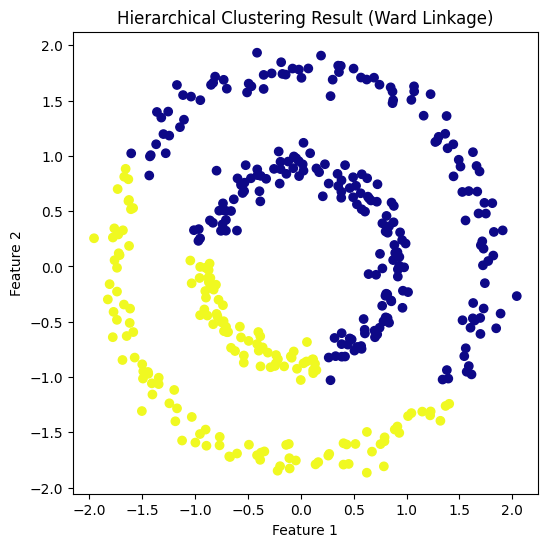

In [33]:
hc_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
hc_ward_labels = hc_ward.fit_predict(X_circles_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=hc_ward_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Ward Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [34]:
print("Single:", np.unique(hc_single_labels))
print("Complete:", np.unique(hc_complete_labels))
print("Average:", np.unique(hc_average_labels))
print("Ward:", np.unique(hc_ward_labels))

Single: [0 1]
Complete: [0 1]
Average: [0 1]
Ward: [0 1]


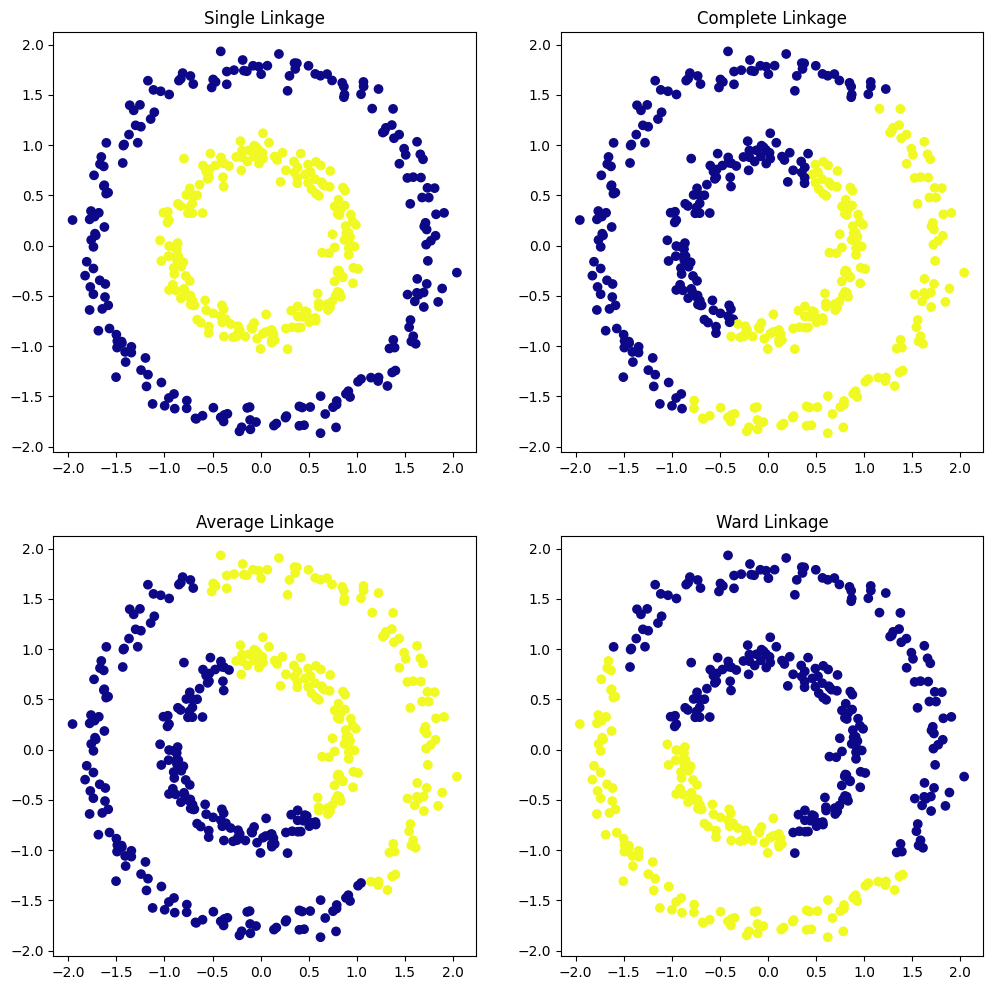

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

axes[0,0].scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=hc_single_labels, cmap='plasma')
axes[0,0].set_title("Single Linkage")

axes[0,1].scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=hc_complete_labels, cmap='plasma')
axes[0,1].set_title("Complete Linkage")

axes[1,0].scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=hc_average_labels, cmap='plasma')
axes[1,0].set_title("Average Linkage")

axes[1,1].scatter(X_circles_scaled[:,0], X_circles_scaled[:,1], c=hc_ward_labels, cmap='plasma')
axes[1,1].set_title("Ward Linkage")

plt.show()


### TODO 6: Dendrogram

Create a dendrogram using Ward linkage.


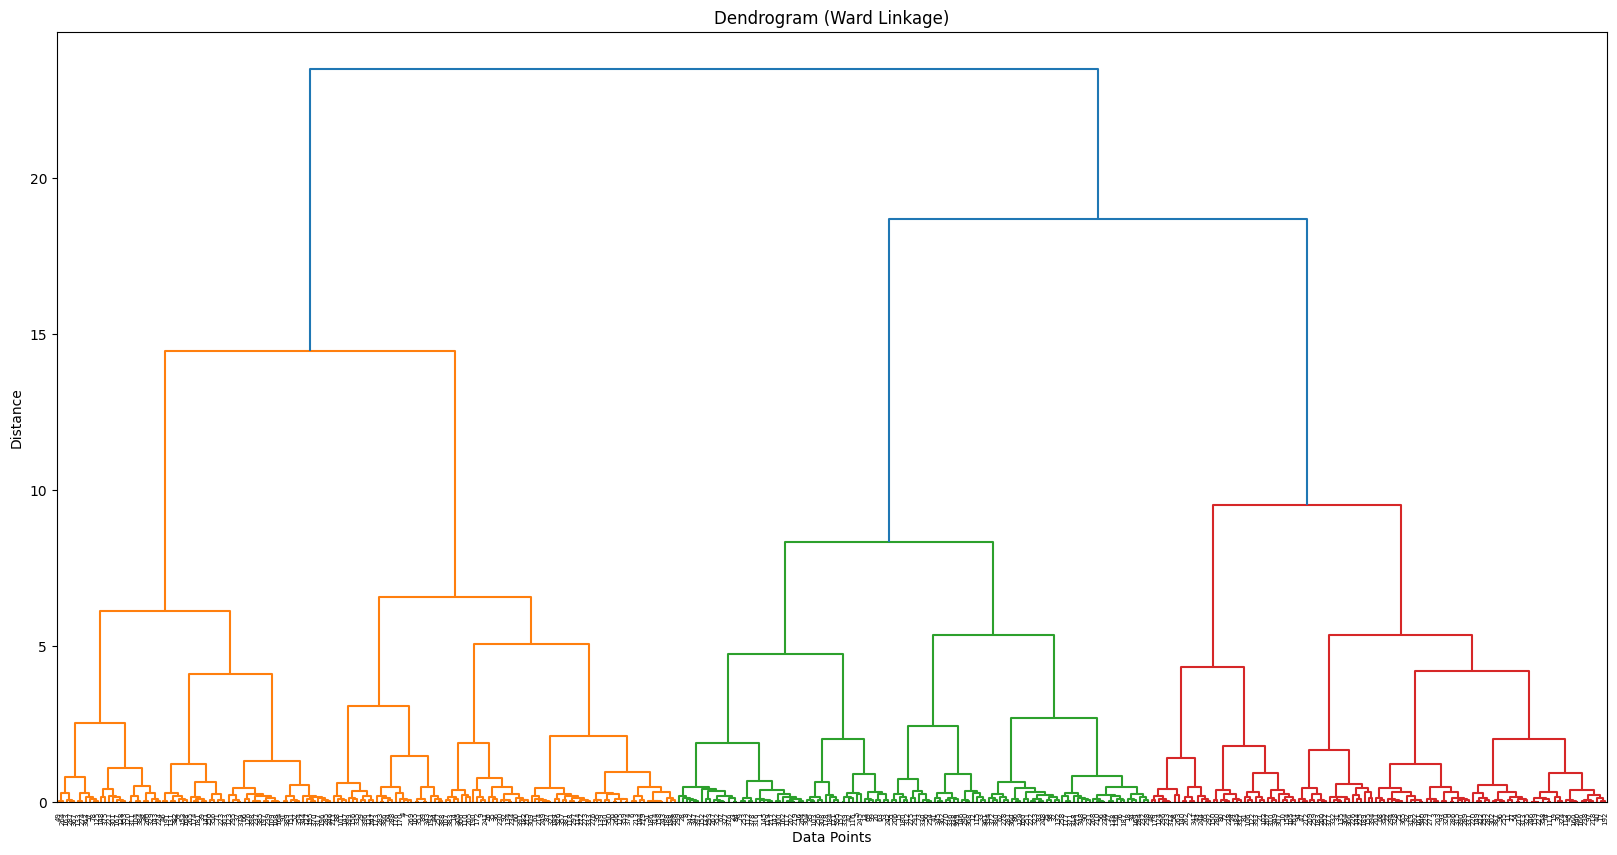

In [36]:
# TODO: Create dendrogram here
linked = linkage(X_circles_scaled, method='ward')

plt.figure(figsize=(20,10))
dendrogram(linked)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

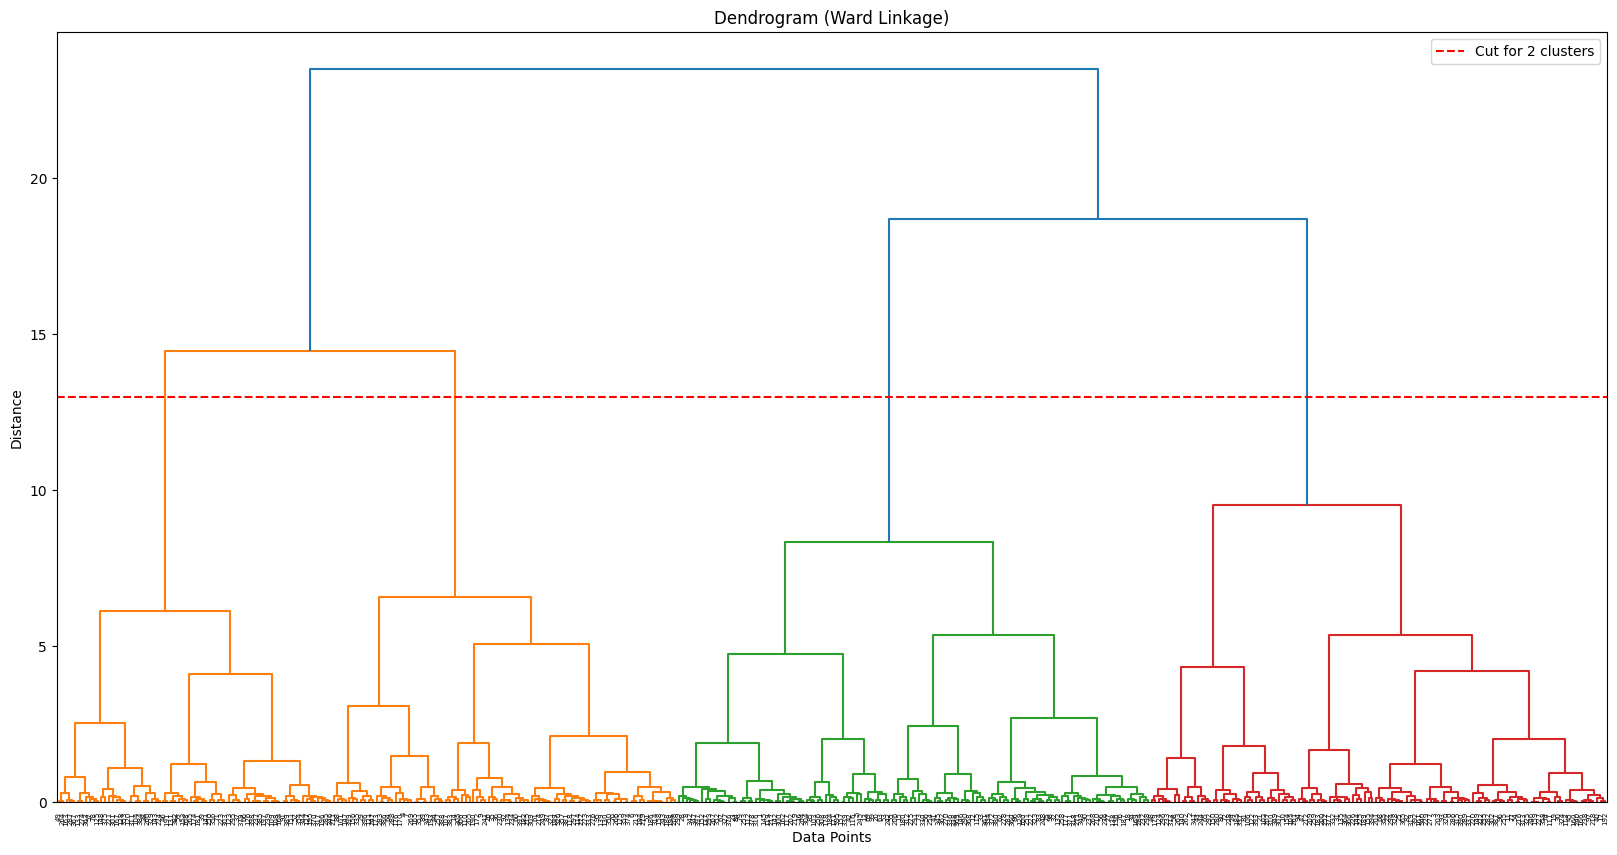

In [40]:
linked = linkage(X_circles_scaled, method='ward')
plt.figure(figsize=(20,10))
dendrogram(linked)
plt.axhline(y=13, color='r', linestyle='--', label='Cut for 2 clusters')
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.legend()
plt.show()


## Reflection Questions

1. Which dataset suits DBSCAN better?
2. How does eps affect noise?
3. Which linkage feels most intuitive?
4. When would you prefer hierarchical clustering?


# 1. Which dataset suits DBSCAN better?
Answer: DBSCAN suits circular and moon-shaped datasets better than blob datasets.

Reason:



*  DBSCAN is density-based and can detect arbitrary shapes (circles, moons, elongated)
*   K-Means and some hierarchical methods only work well with spherical/blob shapes
* DBSCAN successfully separates the inner and outer circles




# 2. How does eps affect noise?
Answer:

* Small eps → More noise points (many points labeled as -1)
* Large eps → Less noise, but may merge separate clusters into one
* Optimal eps → Balanced (5-10% noise)

# 3. Which linkage feels most intuitive?
Answer: Ward linkage feels most intuitive for general use.

Reason:

* Creates compact, balanced clusters
* Minimizes variance within clusters
* Easy to interpret results
* Works well for blob/spherical data

However: Single linkage is better for non-spherical shapes like circles.

# 4. When would you prefer hierarchical clustering?
Answer: Prefer hierarchical clustering when:

* Small dataset (< 10,000 points) - slow on large data

* Don't know cluster number - dendrogram helps decide

* Want to see structure - dendrogram shows relationships

* Need reproducible results - always gives same output (unlike K-Means)

* Hierarchical relationships exist - like organizational structure, taxonomy

Don't use when: Dataset is very large (use K-Means or DBSCAN instead)